#Dataset check

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

* 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.

* 탐색적 데이터 분석(exploratory data analysis) - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.

* feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.

* model 만들기 - sklearn 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 도 있습니다.

* 모델 학습 및 예측 - trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction 합니다.

* 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.

In [11]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/캐글 필사/titanic/titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/캐글 필사/titanic/titanic/test.csv')

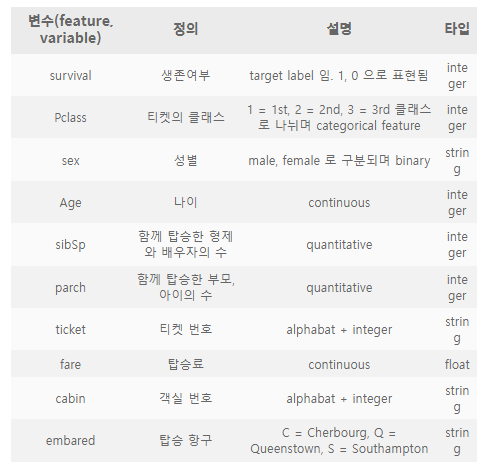

In [12]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [14]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df_train.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               512.329
dtype: object

In [16]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


1. 1 Null data check

In [18]:
for col in df_train.columns:
    msg = 'columns : {:>10}\t Percent of NaN value {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

columns : PassengerId	 Percent of NaN value 0.00%
columns :   Survived	 Percent of NaN value 0.00%
columns :     Pclass	 Percent of NaN value 0.00%
columns :       Name	 Percent of NaN value 0.00%
columns :        Sex	 Percent of NaN value 0.00%
columns :        Age	 Percent of NaN value 19.87%
columns :      SibSp	 Percent of NaN value 0.00%
columns :      Parch	 Percent of NaN value 0.00%
columns :     Ticket	 Percent of NaN value 0.00%
columns :       Fare	 Percent of NaN value 0.00%
columns :      Cabin	 Percent of NaN value 77.10%
columns :   Embarked	 Percent of NaN value 0.22%


In [19]:
for col in df_test.columns:
    msg = 'columns : {:>10}\t Percent of NaN value {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

columns : PassengerId	 Percent of NaN value 0.00%
columns :     Pclass	 Percent of NaN value 0.00%
columns :       Name	 Percent of NaN value 0.00%
columns :        Sex	 Percent of NaN value 0.00%
columns :        Age	 Percent of NaN value 20.57%
columns :      SibSp	 Percent of NaN value 0.00%
columns :      Parch	 Percent of NaN value 0.00%
columns :     Ticket	 Percent of NaN value 0.00%
columns :       Fare	 Percent of NaN value 0.24%
columns :      Cabin	 Percent of NaN value 78.23%
columns :   Embarked	 Percent of NaN value 0.00%


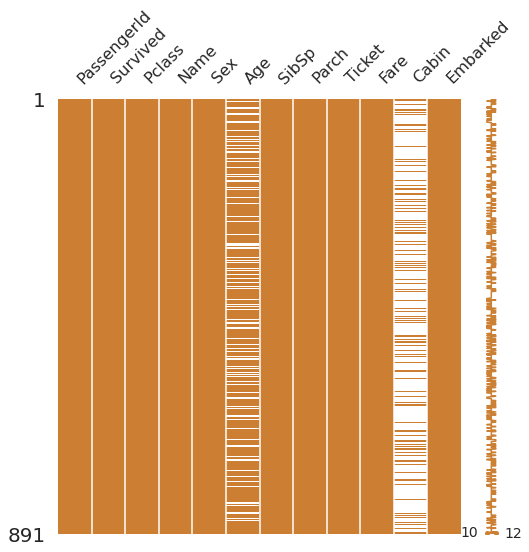

In [26]:
# msno 라이브러리를 사용하면 null data의 존재를 더 쉽게 확인할 수 있음
# - 가장 오른쪽은 스파크라인이고 각 행의 데이터 완성도를 표현

msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))
plt.show()

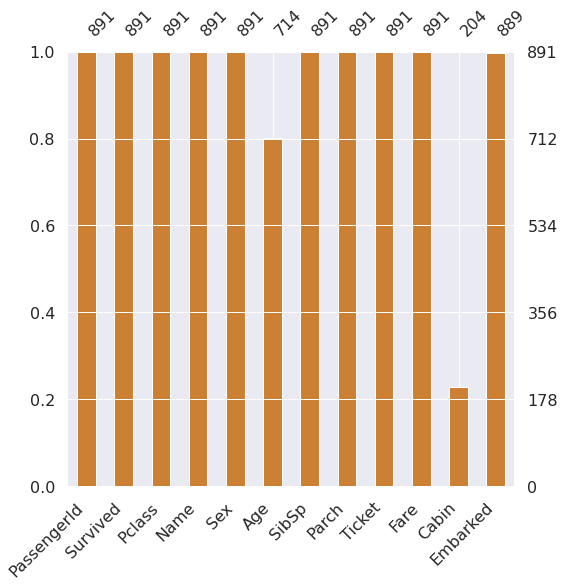

In [27]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))
plt.show()

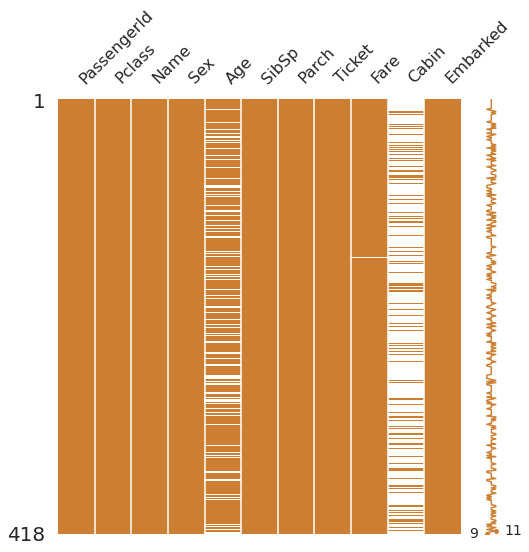

In [28]:
msno.matrix(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))
plt.show()

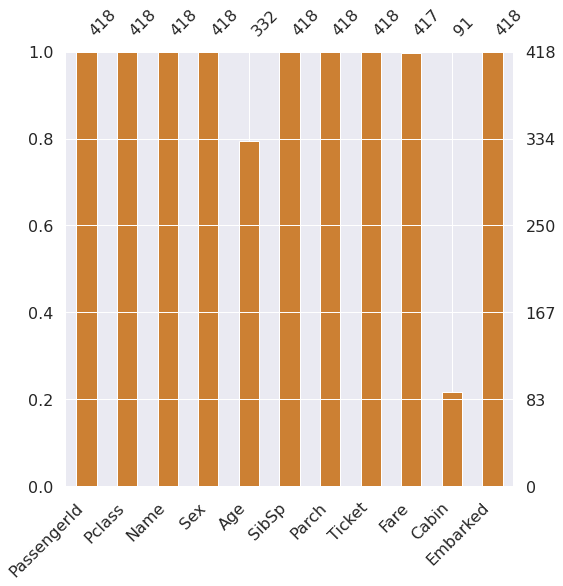

In [29]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))
plt.show()

1. 2 Target label 확인

In [30]:
# Target label이 어떤 distribution을 가지고 있는지 확인할 것

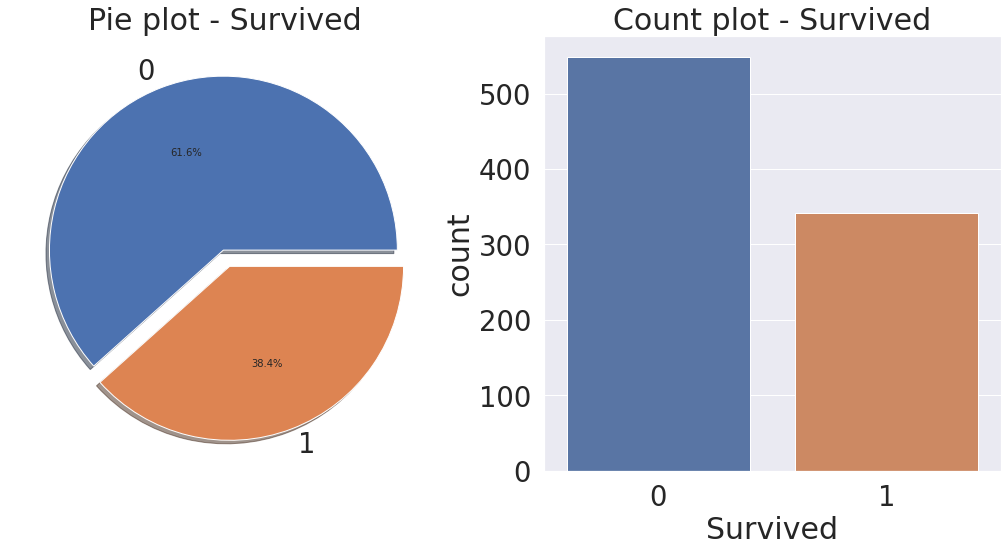

In [41]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0.02, 0.08], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

2. Exploratory data analysis